# 연습문제 - 상관분석

패키지

In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt

## 문제1

다음 자료는 야구팀의 홈런수와 타율에 관한 자료이다.

홈런수와 평균타율이 상관관계가 있는지 그 관련성을 분석하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `홈런수`와 `평균타율`은 서로 상관관계가 없다. |
| 대립가설 | `홈런수`와 `평균타율`은 서로 상관관계가 있다. |

In [2]:
df = read_excel("https://data.hossam.kr/E03/baseball.xlsx")
df

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


### #01. 탐색적 데이터 분석

#### 산점도 그래프를 통한 상관정도 분석

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df.columns

Index(['홈런수', '평균타율'], dtype='object')

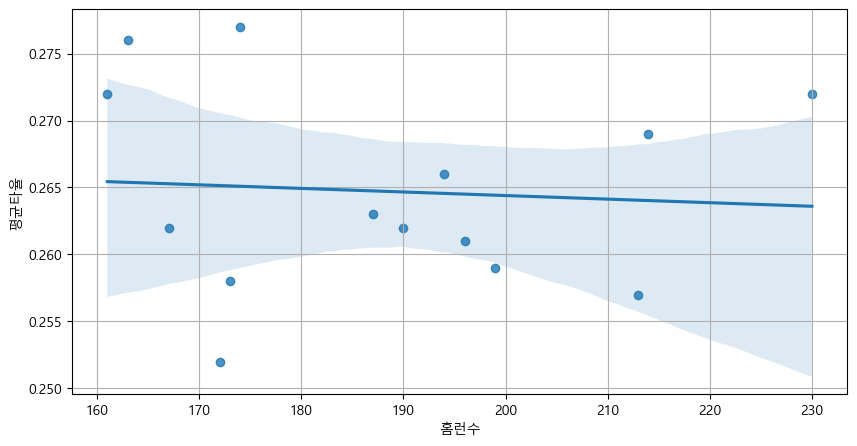

In [5]:
# sb.scatterplot(data=df, x='언어영역', y='수리영역')   #산점도만
sb.regplot(data=df, x='홈런수', y='평균타율') #산점도+추세선
plt.grid()
plt.show()
plt.close()

### #02. 상관분석

#### numpy를 통한 상관계수 구하기

| | 홈런수 | 평균타율 |
| -- | -- | -- |
| 홈런수 | 1 | -0.07469493 |
| 평균타율 | -0.07469493 | 1 |

In [6]:
np.corrcoef(df['홈런수'], df['평균타율'])

array([[ 1.        , -0.07469493],
       [-0.07469493,  1.        ]])

#### 상관계수만 추출

In [7]:
np.corrcoef(df['홈런수'], df['평균타율'])[0,1]

-0.07469493488185412

#### 상관분석 시각화

heatmap

In [8]:
corr = df.corr(method='pearson')
corr

,홈런수,평균타율
홈런수,1.000000,-0.074695
평균타율,-0.074695,1.000000


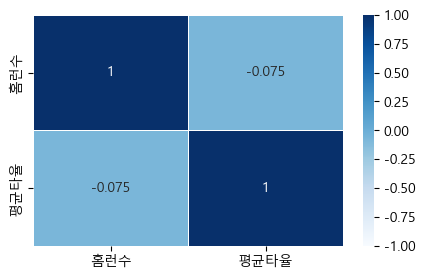

In [9]:
plt.rcParams['figure.figsize']=(5,3)

sb.heatmap(corr,
           annot=True,  #실제 값 화면에 표시
           cmap="Blues",    #색깔
           vmin=-1, vmax=1, #컬러차트 영역(상관계수 범위:-1~1)
           linewidths=.5    #구분선
           )
plt.show()
plt.close()

#### 피어슨 상관계수와 `p-value` 구하기

In [10]:
r,p = stats.pearsonr(df['홈런수'],df['평균타율'])
"상관계수 : %f, p-value : %f"%(r,p)

'상관계수 : -0.074695, p-value : 0.799666'

### 결과 해석

결과의 `상관계수`의 값이 약 `-0.075`, `p-value(유의수준)`값이 약 `0.8`로 0.05보다 크기 때문에 `대립가설을 기각`하고 `귀무가설을 유지`한다. 그러므로 홈런수와 평균타율은 서로 상관이 없다.

## 문제2

어떤 원료의 품질특성($x$)과 이 원료를 사용하여 만든 제품의 품질특성($y$)에 관한 조사를 한 결과 다음 데이터를 얻었다.

이들 간 상관관계를 구하고 상관 유무 검정을 유의수준 5%에서 실시하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `원료의 품질특성`과 `제품의 품질특성`은 서로 상관관계가 없다. |
| 대립가설 | `원료의 품질특성`과 `제품의 품질특성`은 서로 상관관계가 있다. |

In [11]:
df = read_excel("https://data.hossam.kr/E03/product.xlsx")
df

,x,y
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


### #01. 탐색적 데이터 분석

#### 산점도 그래프를 통한 상관정도 분석

In [12]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [13]:
df.columns

Index(['x', 'y'], dtype='object')

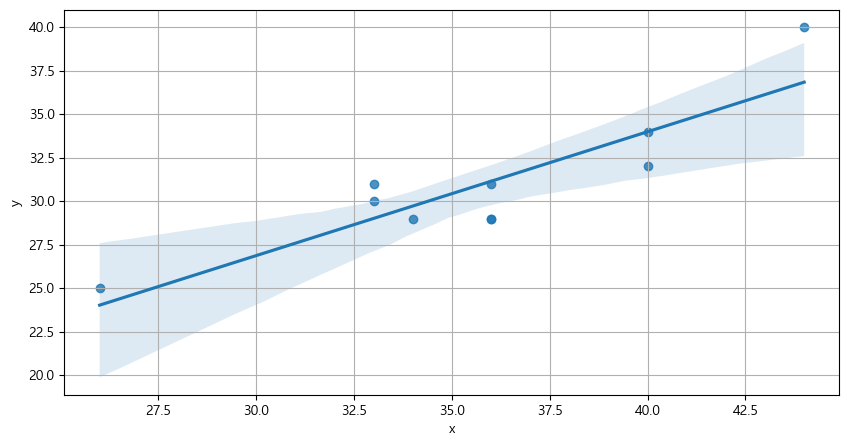

In [14]:
sb.regplot(data=df, x='x', y='y') #산점도+추세선
plt.grid()
plt.show()
plt.close()

### #02. 상관분석

#### numpy를 통한 상관계수 구하기

| | 홈런수 | 평균타율 |
| -- | -- | -- |
| 홈런수 | 1 | 0.88805167 |
| 평균타율 | 0.88805167 | 1 |

In [15]:
np.corrcoef(df['x'], df['y'])

array([[1.        , 0.88805167],
       [0.88805167, 1.        ]])

#### 상관계수만 추출

In [16]:
np.corrcoef(df['x'], df['y'])[0,1]    #0행 1열이 상관계수, 1행0열이 상관계수

0.8880516689960797

#### 피어슨 상관계수와 `p-value` 구하기

In [17]:
r,p = stats.pearsonr(df['x'],df['y'])
"상관계수 : %f, p-value : %f"%(r,p)

'상관계수 : 0.888052, p-value : 0.000599'

#### 상관분석 결과 시각화

상관행렬과 heatmap

In [18]:
corr = df.corr(method='pearson')
corr

,x,y
x,1.000000,0.888052
y,0.888052,1.000000


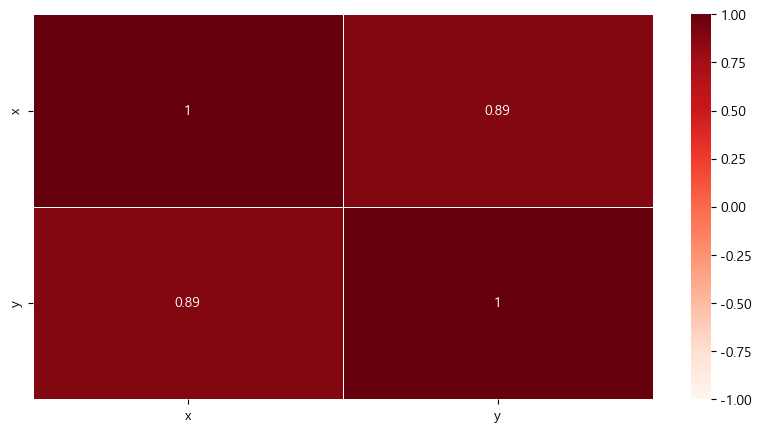

In [19]:
sb.heatmap(corr,
           annot=True,  #실제 값 화면에 표시
           cmap="Reds",    #색깔
           vmin=-1, vmax=1, #컬러차트 영역(상관계수 범위:-1~1)
           linewidths=.5    #구분선
           )
plt.show()
plt.close()

### 결과 해석

결과의 `상관계수`의 값이 약 `0.888`, `p-value(유의수준)`값이 약 `0.0006`로 0.05보다 작기 때문에 `귀무가설을 기각`하고 `대립가설을 채택`한다. 그러므로 `원료의 품질특성`과 `제품의 품질특성`은 서로 관계가 있다.

## 문제3

10명의 학생들에 대한 공부 시간과 성적 데이터를 분석하라.

| 가설 | 내용 |
| -- | -- |
| 귀무가설 | `공부시간`과 `성적`은 서로 관계가 없다. |
| 대립가설 | `공부시간`과 `성적`은 서로 관계가 있다. |

In [20]:
df = read_excel("https://data.hossam.kr/E03/study_time.xlsx")
df

,공부시간,성적
0,2,65
1,4,85
2,3,75
3,5,90
4,6,95
5,7,70
6,8,80
7,9,85
8,10,100
9,1,60


### 공부시간에 따른 성적에 대한 산점도 그래프

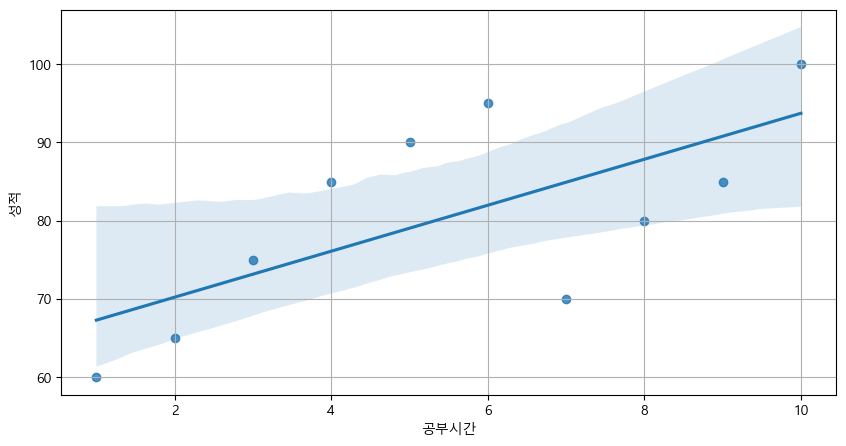

In [21]:
plt.rcParams['figure.figsize']=(10,5)
sb.regplot(data=df, x='공부시간',y='성적')
plt.grid()
plt.show()
plt.close()

#### 중간 해석
공부시간이 늘어남에 따라 성적이 상승하는 경향이 있는 것으로 보인다.

### 상관분석

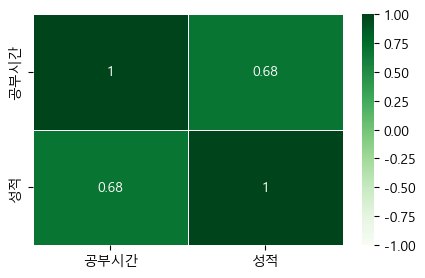

In [22]:
plt.rcParams['figure.figsize']=(5,3)
corr = df.filter(['공부시간', '성적']).corr(method='pearson')

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
           )
plt.show()
plt.close()

#### 중간 해석
분석결과 상관계수가 0.68로 나타나 공부시간과 성적은 양의 상관관계가 있는 것으로 나타남

### 분석결과 검정

피어슨 상관계수와 `p-value` 구하기

In [23]:
stats.pearsonr(df['공부시간'],df['성적'])

PearsonRResult(statistic=0.6842363116996173, pvalue=0.029083749057619408)

### 결과보고

10명의 학생을 대상으로 공부시간에 따른 성적을 조사한 결과 공부시간과 성적의 상관계수($r$)는 약 `0.684`로 `양의 상관관계`를 갖는 것으로 타나났다. `p-value(유의수준)`값이 약 `0.029`로 유의수준 0.05보다 작으므로 이는 통계적으로 유의하다. 결론적으로 학생의 공부시간과 성적은 양의 관계가 있다고 볼 수 있다.